In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style('darkgrid')
import requests
import sys
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import ast
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import nltk
from nltk.text import Text
from datetime import datetime, timedelta



In [2]:
symbolset = string.punctuation

In [3]:
df_24 = pd.read_csv('../After24hours.csv', index_col = False)

In [4]:
df_24

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,...,redditor_for,upvotes,upvote_percent,num_comments,submission_id,upvotes_24,comment_after_1hour,total_number_comments,hot_val_24,upvote_perc_24
0,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,...,1618.662336,2,75,9,qc3dwu,8,11,15,999,71
1,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,...,1861.732471,1,53,18,qc3de5,20,28,80,999,59
2,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,...,2034.134827,5,78,10,qc30zw,20,10,13,999,84
3,5,No,I suggested this few weeks ago and I was ridic...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/4oj1aea3emu71.jpg,Gain,"""2021-10-20T15:01:54",2,24,MgKx,...,1497.069590,20,81,12,qc2uxo,76,14,30,88,80
4,6,No,WISHtards today...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/6mv5z7cctmu71.jpg,Meme,"""2021-10-20T16:27:23",99,22,Janto_2021,...,336.027425,20,92,3,qc4rq4,32171,63,598,7,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,4029,No,Plz Papa don’t hurt me no more,https://old.reddit.com/r/wallstreetbets/commen...,https://v.redd.it/twcds6b41mz71,Meme,"""2021-11-14T19:09:55",2,24,budsonguy,...,1315.947331,24,93,3,qtwxkm,1256,7,56,27,96
3366,4031,No,No autist here posses such deep knowl,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/rnbm77xc6mz71.jpg,Meme,"""2021-11-14T19:39:15",0,15,manchest_hair_united,...,41.967464,42,94,3,qtxkda,4795,19,140,10,98
3367,4032,No,"Me buying 0dte, OTM options",https://old.reddit.com/r/wallstreetbets/commen...,https://v.redd.it/ijhxje2tcmz71,Meme,"""2021-11-14T20:15:52",99,29,Janto_2021,...,361.187561,9,100,1,qtydgm,18,6,6,999,85
3368,4033,No,Like Mattress Companies? TPX Might Be The Setu...,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,Technical Analysis,"""2021-11-14T20:31:37",99,35,tickerwizards,...,321.969860,3,80,1,qtypju,4,2,5,999,56


In [9]:
df_24.head()

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,...,submission_id,upvotes_24,comment_after_1hour,total_number_comments,hot_val_24,upvote_perc_24,propernouns,numbers,hashtags,symbols
0,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,...,qc3dwu,8,11,15,999,71,7.0,0.0,0.0,1.0
1,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,...,qc3de5,20,28,80,999,59,3.0,0.0,0.0,0.0
2,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,...,qc30zw,20,10,13,999,84,2.0,1.0,0.0,1.0
3,5,No,I suggested this few weeks ago and I was ridic...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/4oj1aea3emu71.jpg,Gain,"""2021-10-20T15:01:54",2,24,MgKx,...,qc2uxo,76,14,30,88,80,5.0,1.0,0.0,5.0
4,6,No,WISHtards today...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/6mv5z7cctmu71.jpg,Meme,"""2021-10-20T16:27:23",99,22,Janto_2021,...,qc4rq4,32171,63,598,7,92,0.0,0.0,0.0,0.0


In [5]:
title = df_24.title

In [6]:
n = len(title)
df_24["propernouns"] = np.zeros(n)
df_24["numbers"] = np.zeros(n)
df_24["hashtags"] = np.zeros(n)
df_24["symbols"] = np.zeros(n)
for i in title.index:
    text = title[i]
    words = nltk.word_tokenize(text)
    taggedtoken = nltk.pos_tag(words)
    NPcount = 0
    NUMcount = 0
    SYMcount = 0
    HASHcount = 0
    for word in taggedtoken:
        if word[1] == "NNP" or word[1] == "NNPS":
            NPcount += 1
        if word[1] == "JJ" or word[1] == "CD":
            NUMcount += 1
        if word[0] == "#":
            HASHcount += 1
        if word[0] in symbolset :
            SYMcount += 1
    df_24["propernouns"][i] = NPcount
    df_24["numbers"][i] = NUMcount
    df_24["hashtags"][i] = HASHcount
    df_24["symbols"][i] = SYMcount

<ipython-input-6-5439122b8320>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24["propernouns"][i] = NPcount
<ipython-input-6-5439122b8320>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24["numbers"][i] = NUMcount
<ipython-input-6-5439122b8320>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24["hashtags"][i] = HASHcount
<ipython-input-6-5439122b8320>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [10]:
df_24.loc[df_24.upvotes_24 >= 684, 'popularity'] = 1
df_24.loc[df_24.upvotes_24 < 684, 'popularity'] = 0

In [13]:
upvote = df_24.upvotes.values

In [15]:
logupvote = np.log(upvote)

<ipython-input-15-04e33631926e>:1: RuntimeWarning: divide by zero encountered in log
  logupvote = np.log(upvote)


In [67]:
df_24['upvotes_log']=logupvote

<AxesSubplot:xlabel='hashtags', ylabel='upvotes_log'>

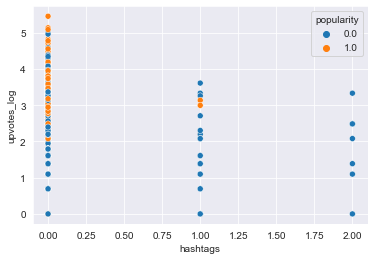

In [71]:
sns.scatterplot(data=df_24, x="hashtags", y="upvotes_log", hue="popularity")

<AxesSubplot:xlabel='propernouns', ylabel='upvotes_log'>

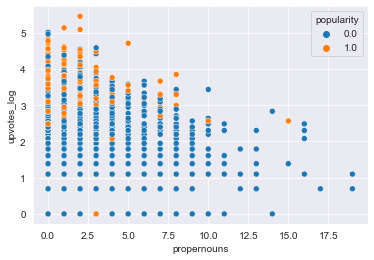

In [68]:
sns.scatterplot(data=df_24, x="propernouns", y="upvotes_log", hue="popularity")

<AxesSubplot:xlabel='numbers', ylabel='upvotes_log'>

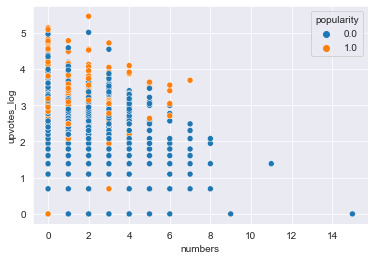

In [69]:
sns.scatterplot(data=df_24, x="numbers", y="upvotes_log", hue="popularity")

<AxesSubplot:xlabel='symbols', ylabel='upvotes_log'>

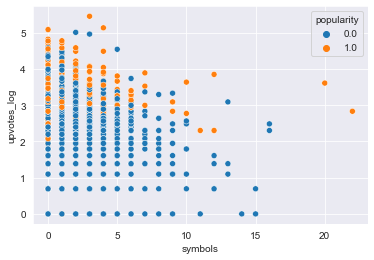

In [70]:
sns.scatterplot(data=df_24, x="symbols", y="upvotes_log", hue="popularity")

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


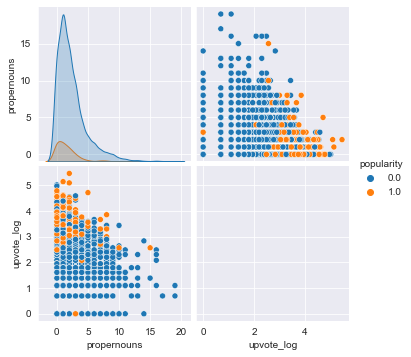

In [20]:
sns.pairplot(df_24, vars = ['propernouns','upvote_log'], hue = 'popularity')

In [21]:
df_24[df_24["popularity"]==1].count()["propernouns"]

368

In [22]:
df_24[df_24["popularity"]==0].count()["propernouns"]

3002

In [24]:
df_24[df_24["propernouns"] < 10].count()["propernouns"]

3308

In [26]:
df_24["propernouns"].describe()

count    3370.000000
mean        2.268546
std         2.439044
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: propernouns, dtype: float64

(array([1609., 1092.,  352.,  164.,   91.,   33.,   13.,    6.,    7.,
           3.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

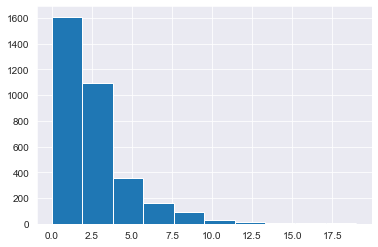

In [28]:
plt.hist(df_24["propernouns"])

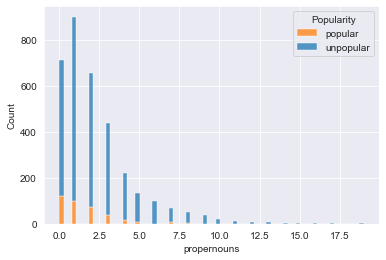

In [59]:
sns.histplot(data = df_24, x = "propernouns", hue = "popularity", multiple = "stack", legend = False)
plt.legend(title='Popularity', loc='upper right', labels=['popular', 'unpopular'])

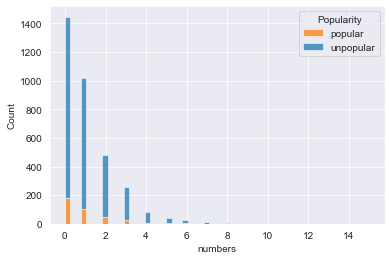

In [60]:
sns.histplot(data = df_24, x = "numbers", hue = "popularity", multiple = "stack",legend = False )
plt.legend(title='Popularity', loc='upper right', labels=['popular', 'unpopular'])

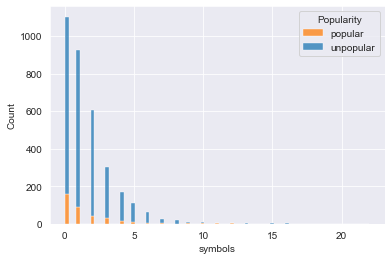

In [61]:
sns.histplot(data = df_24, x = "symbols", hue = "popularity", multiple = "stack", legend = False)
plt.legend(title='Popularity', loc='upper right', labels=['popular', 'unpopular'])

In [34]:
df_24.propernouns.values

array([7., 3., 2., ..., 2., 6., 1.])

In [51]:
s = df_24.groupby(['propernouns'])['popularity'].value_counts(normalize=True)

In [56]:
s

propernouns  popularity
0.0          0.0           0.829577
             1.0           0.170423
1.0          0.0           0.888765
             1.0           0.111235
2.0          0.0           0.888208
             1.0           0.111792
3.0          0.0           0.913440
             1.0           0.086560
4.0          0.0           0.931818
             1.0           0.068182
5.0          0.0           0.954545
             1.0           0.045455
6.0          0.0           0.989691
             1.0           0.010309
7.0          0.0           0.910448
             1.0           0.089552
8.0          0.0           0.903846
             1.0           0.096154
9.0          0.0           1.000000
10.0         0.0           0.947368
             1.0           0.052632
11.0         0.0           1.000000
12.0         0.0           1.000000
13.0         0.0           1.000000
14.0         0.0           1.000000
15.0         0.0           0.666667
             1.0           0.333333
16.0

In [ ]:
#propernouns 가 x 그리고 popular posts의 비율을 보자. 

mincount = min(df_24.propernouns)
maxcount = max(df_24.propernouns)

for i in range(mincount,maxcount):
    